# Generating the atmospheric forcing dataset for GOTM (i.e., `meteo.dat`) from the JRA55-do data for a specific BGC-Argo float

### Load the libraries

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline

### **(User input)** Define the path to the JRA55-do data and load

In [2]:
path2jra = '../wget' # Path to the directory

# Load the data
u10 = xr.open_mfdataset(path2jra+'/uas_*.nc')['uas']
v10 = xr.open_mfdataset(path2jra+'/vas_*.nc')['vas']
airp = xr.open_mfdataset(path2jra+'/psl_*.nc')['psl']
airt = xr.open_mfdataset(path2jra+'/tas_*.nc')['tas']
hum = xr.open_mfdataset(path2jra+'/huss_*.nc')['huss']
precip = xr.open_mfdataset(path2jra+'/prra_*.nc')['prra'] + xr.open_mfdataset(path2jra+'/prsn_*.nc')['prsn'] # total precip = rain + snow
swr = xr.open_mfdataset(path2jra+'/rsds_*.nc')['rsds']
lwr = xr.open_mfdataset(path2jra+'/rlds_*.nc')['rlds']

### **(User input)** Define the float information
- Only `wmoid, lonmid, latmid` are used.
- Obtain the float information from `search-argo-float.ipynb`

In [7]:
wmoid,lonmid,latmid,date0,date1,nprof = [5906503,154.69,19.79,20220107,20240128,74]

### Generate the GOTM meteo file from JRA55-do v1.6.0
- `lon` in jra55-do is given in 0-360 range.

In jra55-do definition:
- specific humidity at 2m (kg/kg)
- air temperature at 2m (K) --> convert to Celcius for gotm
- total precipitation rate, which is a sum of prra and prsn (kg m-2 s-1) --> convert to m s-1 for gotm

In [8]:
# convert negative longitudes to positives such that the longitudes range 0-360 to be compatible with JRA55
if lonmid < 0:
    lonmid += 360
    
u10_1d = u10.sel(lon=lonmid,lat=latmid,method='nearest').values
v10_1d = v10.sel(lon=lonmid,lat=latmid,method='nearest').values
airp_1d = airp.sel(lon=lonmid,lat=latmid,method='nearest').values
airt_1d = airt.sel(lon=lonmid,lat=latmid,method='nearest').values
hum_1d = hum.sel(lon=lonmid,lat=latmid,method='nearest').values
precip_1d = precip.sel(lon=lonmid,lat=latmid,method='nearest').values
swr_1d = swr.sel(lon=lonmid,lat=latmid,method='nearest').values
lwr_1d = lwr.sel(lon=lonmid,lat=latmid,method='nearest').values

In [9]:
lines = []

for i in range(u10.sizes['time']):
    lines.append(
        str(pd.to_datetime(u10['time'][i].values).strftime('%Y-%m-%d %H:%M:%S'))+' '+
        str((u10_1d[i]))+' '+
        str((v10_1d[i]))+' '+
        str((airp_1d[i]))+' '+
        str((airt_1d[i])-273.15)+' '+
        str((hum_1d[i]))+' '+
        str((precip_1d[i])*1e-3)+' '+
        str((swr_1d[i]))+' '+
        str((lwr_1d[i]))+' '
    )
with open('meteo_AR'+str(wmoid)+'.dat', 'w') as file:
    file.write('! date time u10 v10 airp airt hum precip swr lwr \n')
    for line in lines:
        file.write(line + '\n')

### Bonus: visualization of the output

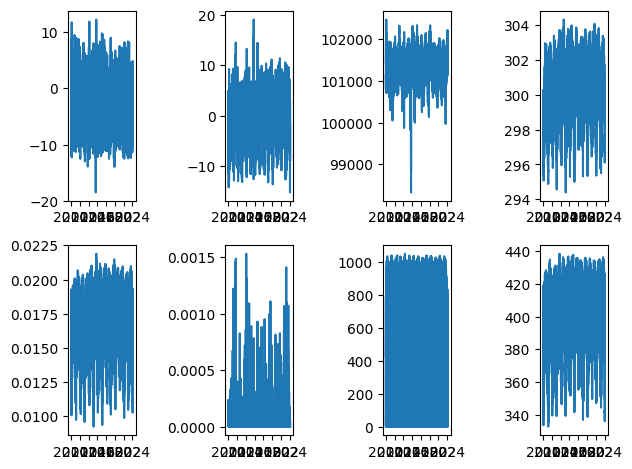

In [10]:
plt.figure()
plt.subplot(241)
plt.plot(u10.time,u10_1d)
plt.subplot(242)
plt.plot(u10.time,v10_1d)
plt.subplot(243)
plt.plot(u10.time,airp_1d)
plt.subplot(244)
plt.plot(u10.time,airt_1d)
plt.subplot(245)
plt.plot(u10.time,hum_1d)
plt.subplot(246)
plt.plot(u10.time,precip_1d)
plt.subplot(247)
plt.plot(u10.time,swr_1d)
plt.subplot(248)
plt.plot(u10.time,lwr_1d)
plt.tight_layout()